Projet Python

----

## What is starcraft ?

Starcraft is a competitive game developed by Blizzard. There is a ranked system within the game : (Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-7 (Ordinal) because the Professionnal leagues is not in the game). Players are placed in a league after having completed 5 placement matches. 

## Our Problematic ?

We want to help the constructor. Why ? Imagine a player has play starcraft for a long time but as never played in a rank situation (game). We can make the player play 5 games with other player in rank (incremental if he win) and estimate based on his stats what rank he deserve.

# Import library

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import chart_studio.plotly as py
import scipy as sp
from sklearn.ensemble import ExtraTreesClassifier
import plotly.express as px
from sklearn import preprocessing
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings


In [287]:
#cf.set_config_file(theme='pearl')
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Import Data

Attribute Information:

1. GameID: Unique ID number for each game (integer)

2. LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal)

3. Age: Age of each player (integer)

4. HoursPerWeek: Reported hours spent playing per week (integer)

5. TotalHours: Reported total hours spent playing (integer)

6. APM: Action per minute (continuous)

7. SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp (continuous)

8. AssignToHotkeys: Number of units or buildings assigned to hotkeys per timestamp (continuous)

9. UniqueHotkeys: Number of unique hotkeys used per timestamp (continuous)

10. MinimapAttacks: Number of attack actions on minimap per timestamp (continuous)

11. MinimapRightClicks: number of right-clicks on minimap per timestamp (continuous)

12. NumberOfPACs: Number of PACs per timestamp (continuous)

13. GapBetweenPACs: Mean duration in milliseconds between PACs (continuous)

14. ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds (continuous)

15. ActionsInPAC: Mean number of actions within each PAC (continuous)

16. TotalMapExplored: The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous)

17. WorkersMade: Number of SCVs, drones, and probes trained per timestamp (continuous)

18. UniqueUnitsMade: Unique unites made per timestamp (continuous)

19. ComplexUnitsMade: Number of ghosts, infestors, and high templars trained per timestamp (continuous)

20. ComplexAbilitiesUsed: Abilities requiring specific targeting instructions used per timestamp (continuous)

In [243]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv")
df=df.replace('?', np.nan)
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,NaN,NaN,NaN,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,NaN,NaN,NaN,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,NaN,NaN,NaN,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,NaN,NaN,NaN,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3340 non-null   object 
 3   HoursPerWeek          3339 non-null   object 
 4   TotalHours            3338 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

# Data cleaning

In [245]:
df["Age"] = df["Age"].apply(float)
df["HoursPerWeek"] = df["HoursPerWeek"].apply(float)
df["TotalHours"] = df["TotalHours"].apply(float)

We look to see the number of missing value by column

In [246]:
df.isna().sum()

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

In [247]:
#check if the ranked distribution is affected if we remove the NAN
df.pivot_table(index="LeagueIndex", 
               values=["Age","HoursPerWeek","TotalHours"], 
               aggfunc= lambda x: x.isna().sum())

,Age,HoursPerWeek,TotalHours
LeagueIndex,,,
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,1,2
6,0,0,0
7,0,0,0
8,55,55,55


We'll remove the professionnal as our problematic focus on the rank from 1 to 7:

In [248]:
df = df[df['LeagueIndex'] != 8]

We'll also remove the Nan value of the 5 rank as they are low in number

In [249]:
df = df.dropna()

In [250]:
df.isna().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

We ll see later if the age and the number of hour played is really important for our estimation

In [251]:
len(df["GameID"].unique()) == len(df["GameID"])

True

We can assume the GameID doesn't provide any additionnal information

In [252]:
data = df.drop('GameID', 1)

# Data representation :

We visualise the data to see if some feature can be remove. 
We'll also look for correlation between features and the leagueIndex

#### Overview of the data :

In [253]:
data.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000
mean,4.120731,21.650389,15.909527,960.421809,114.575763,0.004023,0.000364,4.316357,0.000094,0.000380,0.003433,40.713819,64.209584,5.266955,22.116836,0.001031,6.541043,0.000060,0.000142
std,1.448170,4.206357,11.964495,17318.133922,48.111912,0.004726,0.000210,2.333322,0.000159,0.000359,0.000966,17.057191,19.037394,1.500605,7.440875,0.000520,1.859049,0.000112,0.000266
min,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,3.000000,19.000000,8.000000,300.000000,79.231500,0.001245,0.000202,3.000000,0.000000,0.000139,0.002743,29.326600,50.886425,4.261525,17.000000,0.000682,5.000000,0.000000,0.000000
50%,4.000000,21.000000,12.000000,500.000000,107.070300,0.002445,0.000349,4.000000,0.000039,0.000278,0.003376,37.058900,61.296100,5.087050,22.000000,0.000904,6.000000,0.000000,0.000020
75%,5.000000,24.000000,20.000000,800.000000,140.156100,0.004945,0.000493,6.000000,0.000113,0.000508,0.004003,48.510425,74.032525,6.027350,27.000000,0.001258,8.000000,0.000087,0.000182
max,7.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


### We clean the data of outlier

We can clearly see in the above data description tha someone played 1000000 Hours (it's around 114 years) which is impossible

In [254]:
fig = px.scatter(data,  x='Age', y='TotalHours')

fig.show()

We ll remove all the outlier in the total hour:

By searching a bit online we can find that some of the veteran pros who played the longest must have around 25 000 Hours

In [255]:
data = data[data['TotalHours'] < 25000]

#### Z-score Filtering

3 Standard Deviations from the Mean: 99.7%

In [256]:
std = 3
data = data[data.apply(lambda x: np.abs(x - x.mean()) / x.std() < std).all(axis=1)]

#### Quantile Filtering (not use here)

In [257]:

#df = df.drop(df[df < df.quantile(0.99),df > df.quantile(0.01)])

#or replace outlier by mean (eq to Z-score < 3)
def outliers_IQR(df, remove = True, a = 0.25, b = 0.75):
    q1, q3 =df.quantile(a), df.quantile(b)
    IQR = q3 - q1
    upper, lower = df[~(df>(q3+1.5*IQR))].max(), df[~(df<(q1-1.5*IQR))].min()
    if remove:
        return np.where(df > upper,0,np.where(df < lower,0,df)).dropna().reset_index()
    return np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))


We also want a good looking curve of distribution (normal)

In [258]:
default = "LeagueIndex"
title = f"Dropdown menu : see distribution of column and their {default}"
fig = px.histogram(data, x=default, color='LeagueIndex', title=title,barmode="stack")
buttons = []

for col in list(data.columns):
    fig_host = px.histogram(data, x=col, color='LeagueIndex',barmode="stack")
    buttons.append(dict(label=col,method="update",
            args=[{"x": [trace['x'] for trace in fig_host._data],"title": f"Dropdown {col}"}])
    )

fig.update_traces(overwrite=True, marker={"opacity": 0.6}) 
fig.update_layout(
    updatemenus=[dict(type="dropdown",direction="down",showactive=True,buttons=buttons)]
)

fig.show()

We can see that some plot have a skewed distribution

In [259]:
data.skew()

LeagueIndex            -0.324182
Age                     0.698126
HoursPerWeek            1.065103
TotalHours              1.558711
APM                     0.647340
SelectByHotkeys         1.884467
AssignToHotkeys         0.472265
UniqueHotkeys           0.222238
MinimapAttacks          2.033445
MinimapRightClicks      1.332314
NumberOfPACs            0.479753
GapBetweenPACs          0.827207
ActionLatency           0.612568
ActionsInPAC            0.618456
TotalMapExplored        0.410028
WorkersMade             1.070815
UniqueUnitsMade         0.160916
ComplexUnitsMade        1.879516
ComplexAbilitiesUsed    2.050001
dtype: float64

In [260]:
#def normalize_df(dt):
 #   d = preprocessing.normalize(dt.copy())
 #   tmp = pd.DataFrame(d, columns=dt.columns)
 # tmp["LeagueIndex"] = dt["LeagueIndex"]
 #  return tmp

#normalize_df(data.copy()).skew()

#Pas besoin de normaliser, je crois vue voir en dessous ()

# General overview :

### We will now compute the mean of some features per league and plot it with barplot

In [261]:
mean_HoursPerWeek=[]
mean_TotalHours=[]
mean_Age=[]

mean_APM=[]
mean_MinimapAttacks=[]
mean_NumberOfPACs=[]

mean_GapBetweenPACs=[]
mean_ActionLatency=[]
mean_TotalMapExplored=[]


for k in range(1,9):
    x=df.loc[df['LeagueIndex']==k]['HoursPerWeek'].mean()
    mean_HoursPerWeek.append(x)
    x=df.loc[df['LeagueIndex']==k]['TotalHours'].mean()
    mean_TotalHours.append(x)
    x=df.loc[df['LeagueIndex']==k]['Age'].mean()
    mean_Age.append(x)
    
    x=df.loc[df['LeagueIndex']==k]['APM'].mean()
    mean_APM.append(x)
    x=df.loc[df['LeagueIndex']==k]['MinimapAttacks'].mean()
    mean_MinimapAttacks.append(x)
    x=df.loc[df['LeagueIndex']==k]['NumberOfPACs'].mean()
    mean_NumberOfPACs.append(x)
    
    x=df.loc[df['LeagueIndex']==k]['GapBetweenPACs'].mean()
    mean_GapBetweenPACs.append(x)
    x=df.loc[df['LeagueIndex']==k]['ActionLatency'].mean()
    mean_ActionLatency.append(x)
    x=df.loc[df['LeagueIndex']==k]['TotalMapExplored'].mean()
    mean_TotalMapExplored.append(x)

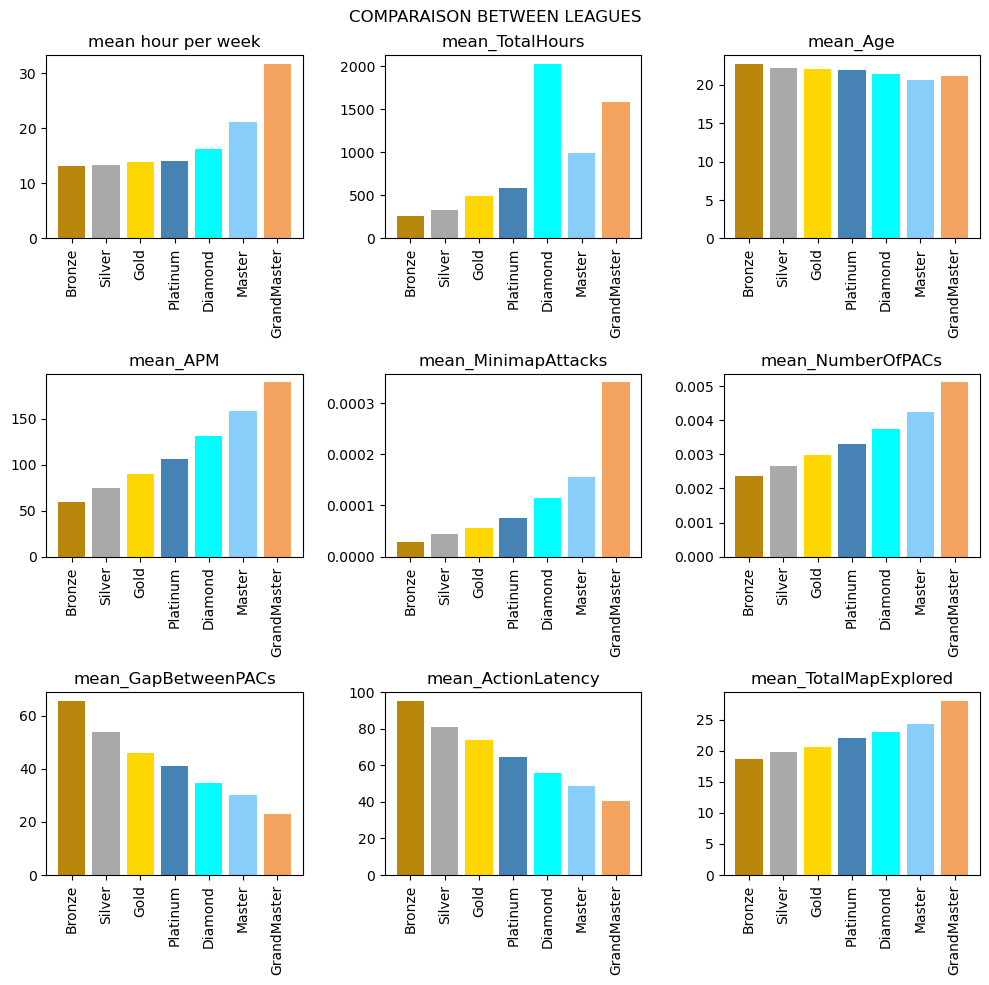

In [262]:
import seaborn as sns

keys1 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professional']
colors = ["darkgoldenrod","darkgray","gold","steelblue","cyan","lightskyblue","sandybrown","lightcoral"]
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(10,10))
fig.suptitle('COMPARAISON BETWEEN LEAGUES')

axes[0,0].bar(keys1,mean_HoursPerWeek,color = colors)
axes[0,0].set_title('mean hour per week')
axes[0,0].tick_params(axis='x', rotation=90)
axes[0,1].bar(keys1,mean_TotalHours,color = colors)
axes[0,1].set_title('mean_TotalHours')
axes[0,1].tick_params(axis='x', rotation=90)
axes[0,2].bar(keys1,mean_Age,color = colors)
axes[0,2].set_title('mean_Age')
axes[0,2].tick_params(axis='x', rotation=90)



axes[1,0].bar(keys1,mean_APM,color = colors)
axes[1,0].set_title('mean_APM')
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,1].bar(keys1,mean_MinimapAttacks,color = colors)
axes[1,1].set_title('mean_MinimapAttacks')
axes[1,1].tick_params(axis='x', rotation=90)
axes[1,2].bar(keys1,mean_NumberOfPACs,color = colors)
axes[1,2].set_title('mean_NumberOfPACs')
axes[1,2].tick_params(axis='x', rotation=90)


axes[2,0].bar(keys1,mean_GapBetweenPACs,color = colors)
axes[2,0].set_title('mean_GapBetweenPACs')
axes[2,0].tick_params(axis='x', rotation=90)
axes[2,1].bar(keys1,mean_ActionLatency,color = colors)
axes[2,1].set_title('mean_ActionLatency')
axes[2,1].tick_params(axis='x', rotation=90)
axes[2,2].bar(keys1,mean_TotalMapExplored,color = colors)
axes[2,2].set_title('mean_TotalMapExplored')
axes[2,2].tick_params(axis='x', rotation=90)

fig.tight_layout()

Number of players per rank :

<BarContainer object of 7 artists>

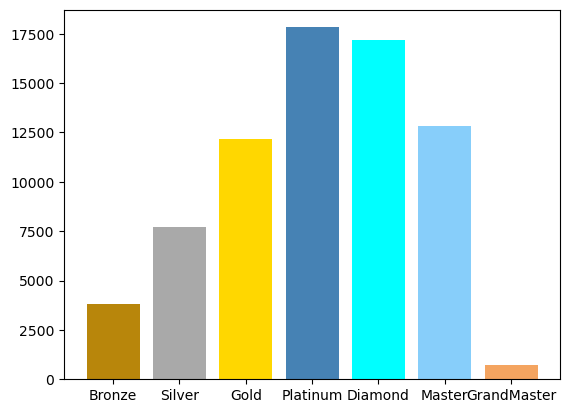

In [263]:
keys1 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster']
colors = ["darkgoldenrod","darkgray","gold","steelblue","cyan","lightskyblue","sandybrown","lightcoral"]
Age_per_rank = []
n = len(keys1)
for k in range(1,n+1):
    x=df.loc[df['LeagueIndex']==k]['Age'].sum()
    Age_per_rank.append(x)
plt.bar(keys1,Age_per_rank,color = colors)

## Machine Learning to predict ranks based on chosen features

We ll try to find for each column the best transformation, se we can have a really nice distributed curve

In [264]:
data.shape

(2720, 19)

In [265]:
from sklearn.model_selection import train_test_split

y, X = data["LeagueIndex"], data.drop("LeagueIndex", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)
tmp = X_train.copy()
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2040, 18)
(680, 18)
(2040,)
(680,)


In [266]:
transf_data = X_train
normal_data = tmp
transf_data['LeagueIndex'], normal_data['LeagueIndex'] = Y_train, Y_train
transf_data.head()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,LeagueIndex
1215,22.0,16.0,300.0,99.1626,0.003474,0.000523,4,0.000094,0.000121,0.003675,39.8974,65.8978,4.1423,20,0.000805,6,0.0,0.000000,5
1834,21.0,4.0,400.0,121.9920,0.005462,0.000433,10,0.000403,0.000675,0.003316,38.9756,54.5410,5.3191,21,0.000857,6,0.0,0.000262,5
722,19.0,24.0,350.0,115.3236,0.002736,0.000375,8,0.000014,0.000597,0.003792,45.7647,63.5458,5.0916,20,0.001889,6,0.0,0.000000,3
2093,33.0,12.0,30.0,46.5420,0.001089,0.000239,3,0.000010,0.000115,0.002320,58.2149,111.0288,3.4691,20,0.000411,6,0.0,0.000000,1
421,19.0,28.0,480.0,120.9294,0.002083,0.000184,6,0.000033,0.000141,0.003558,34.0673,63.5732,5.6311,28,0.001193,6,0.0,0.000000,3


In [267]:
default = "LeagueIndex"
title = f"Dropdown menu : see distribution of column and their {default}"

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("normal data", "clean data"),
)

fig.add_trace(go.Histogram(histfunc="count",x=normal_data["LeagueIndex"]), row=1, col=1)
fig.add_trace(go.Histogram(histfunc="count",x=transf_data["LeagueIndex"]), row=1, col=2)

buttons = []
for colunm in list(X_train.columns):
    fig_host = make_subplots(
        rows=1, cols=2,
        subplot_titles=("normal data", "clean data"),
    )
    fig_host.add_trace(go.Histogram(histfunc="count",x=normal_data[colunm]), row=1, col=1)
    fig_host.add_trace(go.Histogram(histfunc="count",x=transf_data[colunm]), row=1, col=2)

    buttons.append(dict(label=colunm,method="update",
            args=[{"x": [trace['x'] for trace in fig_host._data],"title": f"Dropdown {colunm}"}])
    )

fig.update_traces(overwrite=True, marker={"opacity": 0.6}) 
fig.update_layout(
    updatemenus=[dict(type="dropdown",direction="down",showactive=True,buttons=buttons)]
)

fig.show()

### Feature

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. 

The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.


Irrelevant or partially relevant features can negatively impact model performance.

Feature selection and Data cleaning should be the first and most important step of your model designing.

##### Correlation Matrix with Heatmap

Text(0.5, 1.0, 'Features Correlating with the Rank')

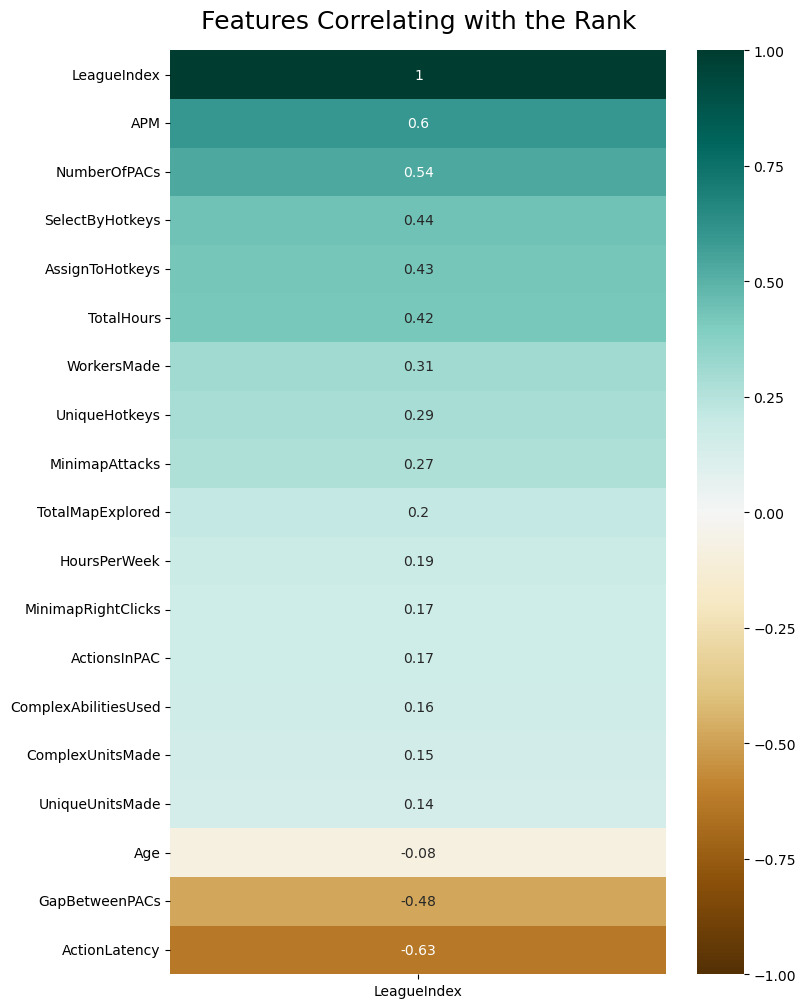

In [268]:
plt.figure(figsize=(8, 12))
res1 = transf_data.corr()[['LeagueIndex']].sort_values(by='LeagueIndex', ascending=False)
heatmap = sns.heatmap(res1, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the Rank', fontdict={'fontsize':18}, pad=16)

#### Univariate Selection

Use of the chi-squared (chi²) statistical test for non-negative features

we could have also use : sklearn.feature_selection.SelectPercentile

In [269]:
X = transf_data.iloc[:,:transf_data.shape[1] - 1]
y = transf_data.iloc[:,-1]

bestf = SelectKBest(score_func=chi2, k=12)
fit = bestf.fit(X,y)

res2 = pd.DataFrame(fit.scores_,index=X.columns)
res2.columns = ['Chi2']
res2.nlargest(10,'Chi2')

,Chi2
TotalHours,114092.919789
APM,10962.538164
ActionLatency,3334.569717
GapBetweenPACs,2337.374002
HoursPerWeek,710.922976
UniqueHotkeys,234.853988
TotalMapExplored,189.761634
UniqueUnitsMade,22.229062
ActionsInPAC,20.847626
Age,17.154132


#### Feature importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers

<AxesSubplot:>

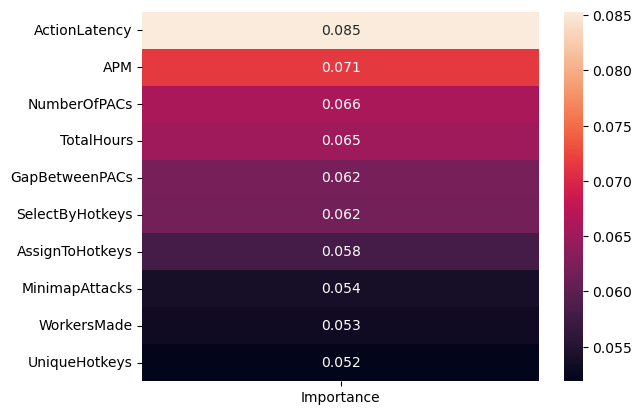

In [270]:
X = transf_data.iloc[:,:transf_data.shape[1] - 1]
y = transf_data.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(X,y)

res3 = pd.DataFrame(model.feature_importances_, index=X.columns)
res3.columns = ['Importance']
sns.heatmap(res3.nlargest(10, 'Importance'), annot=True)

### Base exclusivly on this statisticle value, we can choose which column are representative for our problematics

In [271]:
res1 = res1.apply(lambda i : abs(i))

score = pd.concat([res3, res2, res1],axis=1)
score.columns = ['Importance', 'Chi2','Corr']
score = score.dropna()
score = score.sort_values(by=['Importance'],ascending=[False])
score

,Importance,Chi2,Corr
ActionLatency,0.085304,3334.569717,0.627047
APM,0.071485,10962.538164,0.598606
NumberOfPACs,0.066001,0.132840,0.536327
TotalHours,0.064987,114092.919789,0.415451
GapBetweenPACs,0.062043,2337.374002,0.479185
SelectByHotkeys,0.061758,1.370746,0.443441
AssignToHotkeys,0.057906,0.039409,0.427910
MinimapAttacks,0.053907,0.023092,0.272900
WorkersMade,0.053182,0.039907,0.305568
UniqueHotkeys,0.051866,234.853988,0.286167


Columns chosen are :

In [272]:
features = ["TotalHours","APM","SelectByHotkeys","AssignToHotkeys","MinimapAttacks","NumberOfPACs","GapBetweenPACs","ActionLatency","ActionsInPAC","TotalMapExplored","WorkersMade"]

Data preprocessing

In [273]:
#def clean_curve(dt):
#    for e in dt:
#       if e != "LeagueIndex":
            #we could have use Box-Cox Transformation Method but we have some null vale (even though we dont have negativ value)
            #dt[e], _ = sp.stats.yeojohnson(dt[e],lmbda=None)
    #return dt

from sklearn.preprocessing import PowerTransformer

X_train = X_train.drop("LeagueIndex", axis=1)

scaler = PowerTransformer()
scaler.fit(X_train)                 # only fit training data
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

In [274]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(X_train)                 # only fit training data
#X_train = scaler.transform(X_train)
#X_test  = scaler.transform(X_test)  # apply same transformation to test data

Starting with a linear regression

In [275]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=1000).fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.39705882352941174

KNN

In [276]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,Y_train)
knn.score(X_test, Y_test)

0.31176470588235294

Support Vector Machine

In [277]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,Y_train)
clf.score(X_test, Y_test)

0.38235294117647056

stochastic gradient descent

In [278]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
sgd.fit(X_train, Y_train)
sgd.score(X_test, Y_test)

0.3088235294117647

Decision Tree

In [279]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
dtree.score(X_test, Y_test)

0.3014705882352941

Recursive feature elimination with cross-validation to select features.

In [280]:
from sklearn.feature_selection import RFECV
estimator = reg
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train, Y_train)
selector.support_

array([ True, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True, False, False, False, False, False])

changer les features que l'on garde (à faire)

Grid search for Support Vector Machine

In [281]:
from sklearn.model_selection import GridSearchCV
parameters = {'gamma' : [0.01, 0.02, 0.03]}

grid = GridSearchCV(svm.SVC(), parameters, n_jobs=-1, cv=5)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.41421568627450983 SVC(gamma=0.02)


In [282]:
from sklearn.model_selection import GridSearchCV
parameters = {  'C'      : [0.9, 1, 1.1, 1.2]             ,
                'gamma'  : [0.01, 0.02, 0.03]      }
grid = GridSearchCV(svm.SVC(), parameters, n_jobs=-1, cv=5)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.41421568627450983 SVC(C=1, gamma=0.02)


In [283]:
from sklearn.model_selection import GridSearchCV
parameters = {  'C'       : [0.9, 1, 1.1, 1.2]    ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.02],}
grid = GridSearchCV(svm.SVC(), parameters, n_jobs=-1, cv=5)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.41421568627450983 SVC(C=1, gamma=0.02)


GridSearch for LogisticRegression

In [284]:
estimator.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [285]:
from sklearn.model_selection import GridSearchCV
parameters = {  'C'  : np.linspace(1, 4, 20)}
grid = GridSearchCV(LogisticRegression(max_iter=500), parameters)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.42401960784313725 LogisticRegression(C=1.631578947368421, max_iter=500)


In [286]:
parameters = {  'C'  : np.linspace(3, 4, 50)}
grid = GridSearchCV(LogisticRegression(max_iter=500), parameters)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

KeyboardInterrupt: 

GridSearch for Decision Tree

In [ ]:
tree.DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
parameters = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
grid = GridSearchCV(tree.DecisionTreeClassifier(), parameters)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.3583333333333333 DecisionTreeClassifier(max_depth=5)


GridSearch for Lasso (linear model)

In [ ]:
from sklearn.linear_model import Lasso
parameters = {"max_iter" : [1000],
         "alpha" : np.linspace(0.001, 0.01, 20), 
         "selection": ["random", "cyclic"]}
grid = GridSearchCV(Lasso(), parameters)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.5477550068866608 Lasso(alpha=0.004789473684210527, selection='random')


XGBoost

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

In [ ]:
from xgboost import XGBClassifier
algo = XGBClassifier()
algo.fit(X_train, Y_train)
algo.score(X_test, Y_test)

0.3720588235294118

GridSearch

In [ ]:
algo.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [ ]:
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid = GridSearchCV(algo, parameters)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

KeyboardInterrupt: 

Results : 0.41030738522954086 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

It took 15 min to compute if you want to try

## testing sklearn algo

In [ ]:
# from sklearn import *

def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print( e)
        if verbose: print ("="*30)
    return algos

In [ ]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))


===> decomposition
DictionaryLearning,FactorAnalysis,FastICA,IncrementalPCA,KernelPCA,LatentDirichletAllocation,MiniBatchDictionaryLearning,MiniBatchSparsePCA,NMF,PCA,SparseCoder,SparsePCA,TruncatedSVD

===> dummy
DummyClassifier,DummyRegressor

===> ensemble
AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,GradientBoostingClassifier,GradientBoostingRegressor,HistGradientBoostingClassifier,HistGradientBoostingRegressor,IsolationForest,RandomForestClassifier,RandomForestRegressor,RandomTreesEmbedding,StackingClassifier,StackingRegressor,VotingClassifier,VotingRegressor

===> feature_selection
GenericUnivariateSelect,RFE,RFECV,SelectFdr,SelectFpr,SelectFromModel,SelectFwe,SelectKBest,SelectPercentile,SequentialFeatureSelector,VarianceThreshold

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,GammaRegressor,HuberRegressor,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,Logis

### Utiliser chaque algo et conserver les performances

In [ ]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(X_train, Y_train)
        performance = algorithme.score(X_test, Y_test)
        print (performance)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print ("="*30)
   

Dictionary learning.
'DictionaryLearning' object has no attribute 'scor
Factor Analysis (FA).
-22.541976419818038
FastICA


c:\Users\noamc\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



'FastICA' object has no attribute 'score'
Incremental principal com
'IncrementalPCA' object has no attribute 'score'
Kernel Principal componen
'KernelPCA' object has no attribute 'score'
Latent Dirichlet Allocati
Negative values in data passed to LatentDirichletA
Mini-batch dictionary lea
'MiniBatchDictionaryLearning' object has no attrib
Mini-batch Sparse Princip
'MiniBatchSparsePCA' object has no attribute 'scor
Non-Negative Matrix Facto
Negative values in data passed to NMF (input X)
Principal component analy
-20.580583180264778
__init__() missing 1 required positional argument:
Sparse Principal Componen
'SparsePCA' object has no attribute 'score'
Dimensionality reduction
'TruncatedSVD' object has no attribute 'score'
DummyClassifier makes pre
0.27205882352941174
Regressor that makes pred
-0.004624753990920993
An AdaBoost classifier.
0.23970588235294119
An AdaBoost regressor.
0.49255731388106694
A Bagging classifier.
0.38088235294117645
A Bagging regressor.
0.48405947845834485
An ex

c:\Users\noamc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



c:\Users\noamc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import 

-0.1361754611547148
Cross-validated Least Ang
0.5368919087451318
Linear Model trained with
-0.004624753990920993
Lasso linear model with i
0.5512873335507702
Lasso model fit with Leas
-0.004624753990920993
Cross-validated Lasso, us
0.5512935129244289
Lasso model fit with Lars
0.5506767857096124
Ordinary least squar
0.5511650737927152
Logistic Regression
0.39558823529411763
Logistic Regression CV (a


c:\Users\noamc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\noamc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\noamc\anaconda3\lib\site-packages

0.3911764705882353
Multi-task ElasticNet mod
For mono-task outputs, use ElasticNet
Multi-task L1/L2 ElasticN
For mono-task outputs, use ElasticNetCVCV
Multi-task Lasso model tr
For mono-task outputs, use ElasticNet
Multi-task Lasso model tr
For mono-task outputs, use LassoCVCV
Orthogonal Matching Pursu
0.38513046156759656
Cross-validated Orthogona
0.5297993083565518
Passive Aggressive Classi
0.24558823529411763
Passive Aggressive Regres
0.15738922803443778
Linear perceptron classif
0.3161764705882353
Generalized Linear Model
0.4261927607671536
Linear regression model t


c:\Users\noamc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



c:\Users\noamc\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

-0.0005244020344548073
RANSAC (RANdom SAmple Con
0.23693139462889712
Linear least squares with
0.5511897608459704
Ridge regression with bui
0.5512542484695117
Classifier using Ridge re
0.3382352941176471
Ridge classifier with bui
0.3382352941176471
Linear classifiers (SVM,
0.3029411764705882
Solves linear One-Class S
'SGDOneClassSVM' object has no attribute 'score'
Linear model fitted by mi
0.5508784385022452
Theil-Sen Estimator
0.5479484658291911
Generalized Linear Model
0.510533609981944
__init__() missing 2 required positional arguments
__init__() missing 2 required positional arguments
Classifier implementing t
0.34705882352941175
Regression based on k-nea
0.4661708683837583
Transform X into a (weigh
'KNeighborsTransformer' object has no attribute 's
Kernel Density Estimation


c:\Users\noamc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



-17206.086056166627
Unsupervised Outlier Dete
'LocalOutlierFactor' object has no attribute 'scor
Nearest centroid classifi
0.3205882352941177
Unsupervised learner for
'NearestNeighbors' object has no attribute 'score'
Neighborhood Components A
'NeighborhoodComponentsAnalysis' object has no att
Classifier implementing a
Algo de classification
Regression based on neigh
-4.2557601460615585e+37
Transform X into a (weigh
'RadiusNeighborsTransformer' object has no attribu
Binarize data (set featur
'Binarizer' object has no attribute 'score'
Constructs a transformer
'FunctionTransformer' object has no attribute 'sco
Bin continuous data
'KBinsDiscretizer' object has no attribute 'score'
Center an arbitrary kerne
Kernel matrix must be a square matrix. Input is a 
Binarize labels in a one-
fit() takes 2 positional arguments but 3 were give
Encode target labels with
fit() takes 2 positional arguments but 3 were give
Scale each feature by its
'MaxAbsScaler' object has no attribute 'score'
Transfor

c:\Users\noamc\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 7 are removed. Consider decreasing the number of bins.

c:\Users\noamc\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 16 are removed. Consider decreasing the number of bins.

c:\Users\noamc\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 17 are removed. Consider decreasing the number of bins.

c:\Users\noamc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\noamc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



0.3382352941176471
Linear Support Vector Reg
0.5473188056369189
Nu-Support Vector Classif
specified nu is infeasible
Nu Support Vector Regress
0.5383828122972024
Unsupervised Outlier Dete
'OneClassSVM' object has no attribute 'score'
C-Support Vector Classifi
0.3985294117647059
Epsilon-Support Vector Re
0.5316576403641433
'module' object is not callable
Can't instantiate abstract class BaseDecisionTree 
A decision tree classifie
0.3191176470588235
A decision tree regressor
0.0061064666137932155
An extremely randomized t
0.3
An extremely randomized t
0.025262309362526603


### meilleur algo

In [ ]:
best_algorithm, best_perf

(GradientBoostingRegressor(), 0.5574737702290868)

### Performances de chaque algo :

In [ ]:
performances

{'DummyClassifier makes pre': [0.27205882352941174],
 'An AdaBoost classifier.': [0.23970588235294119],
 'An AdaBoost regressor.': [0.49255731388106694],
 'A Bagging classifier.': [0.38088235294117645],
 'A Bagging regressor.': [0.48405947845834485],
 'An extra-trees class': [0.38235294117647056],
 'An extra-trees regre': [0.5416596240774209],
 'Gradient Boosting for cla': [0.3779411764705882],
 'Gradient Boosting for reg': [0.5574737702290868],
 'Histogram-based Gradient': [0.5294942958353863],
 'A random forest clas': [0.3779411764705882],
 'A random forest regr': [0.5443327482566883],
 'Bayesian ARD regression.': [0.5510750035500931],
 'Bayesian ridge regression': [0.5509485310408426],
 'Linear regression with co': [0.25463827893478463],
 'Elastic Net model with it': [0.5511149944008015],
 'Linear regression model t': [0.5490198908701724],
 'Cross-validated Least Ang': [0.5368919087451318],
 'Lasso linear model with i': [0.5512873335507702],
 'Cross-validated Lasso, us': [0.55129351

In [ ]:
import pandas as pd
df = pd.DataFrame(performances).T
col_name = "performance"
df.columns = [col_name]
df = df.sort_values("performance",ascending=False)
df

,performance
Gradient Boosting for reg,0.557474
"Cross-validated Lasso, us",0.551294
Lasso linear model with i,0.551287
Ridge regression with bui,0.551254
Linear least squares with,0.551190
Ordinary least squar,0.551165
Elastic Net model with it,0.551115
Bayesian ARD regression.,0.551075
Bayesian ridge regression,0.550949
Linear model fitted by mi,0.550878


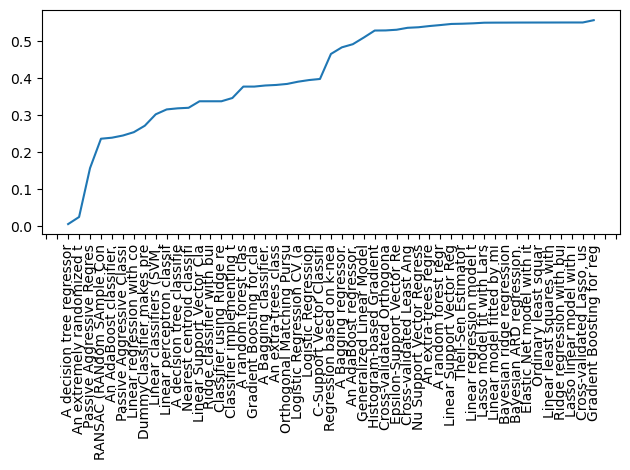

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
ax.plot(df)
ax.set_xticks(ticks=np.arange(len(df.index)),labels=df.index)
ax.xaxis.set_ticklabels(df.index,rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
fig.tight_layout()
plt.show()

we perform less that xgboost..

In [ ]:
from sklearn.linear_model import RidgeClassifierCV
algo = RidgeClassifierCV()
algo.fit(X_train, Y_train)
algo.score(X_test, Y_test)

0.3382352941176471

In [ ]:
algo.get_params().keys()

dict_keys(['alphas', 'class_weight', 'cv', 'fit_intercept', 'normalize', 'scoring', 'store_cv_values'])

Grid Search for best algorithms

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
algo = GradientBoostingRegressor()
algo.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
            'subsample'    : [0.9, 0.5, 0.2, 0.1],
            'n_estimators' : [100,500,1000, 1500],
            'max_depth'    : [4,6,8,10]
            }
grid = GridSearchCV(GradientBoostingRegressor(), parameters)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LassoCV
las = LassoCV()
las.fit(X_train,Y_train)
las.score(X_test, Y_test)

0.5512873335507702

In [ ]:
from sklearn.linear_model import ARDRegression
algo = ARDRegression()
algo.get_params().keys()

dict_keys(['alpha_1', 'alpha_2', 'compute_score', 'copy_X', 'fit_intercept', 'lambda_1', 'lambda_2', 'n_iter', 'normalize', 'threshold_lambda', 'tol', 'verbose'])

In [ ]:
tab = [10**(-k) for k in range(3,8)]
parameters = {'alpha_1': tab,
            'alpha_2'    : tab,
            'lambda_1' : tab,
            'lambda_2'    : tab
            }
grid = GridSearchCV(ARDRegression(), parameters)
grid.fit(X_train, Y_train)
print (grid.best_score_, grid.best_estimator_)

0.547581031134088 ARDRegression(alpha_1=1e-07, alpha_2=0.001, lambda_1=0.001, lambda_2=0.001)
